<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> **NLP and Machine Learning: Sentiment Analysis on Reviews Dataset**</b></div>

</div>

## **Objective**
How to process textual data, extract features, train various machine learning models, and evaluate their performance on a reviews dataset.

---

## **Part 1: Setup and Data Loading**

1. **Load the Dataset**  
   - Use `Pandas` to read the dataset from a CSV file.
   - Display the first few rows of the dataset to understand its structure.

---

## **Part 2: Data Preprocessing**

Preprocess the text data using the following steps:

1. **Convert all text to lowercase**  
2. **Remove all non-alphanumeric characters (punctuation, numbers, etc.)**  
3. **Tokenize the text**  
4. **Remove stop words using NLTK**  
5. **Apply lemmatization using WordNetLemmatizer from NLTK**
6. **Remove the URL's**
7. **Any Possible Processing**

---

## **Part 3: Feature Extraction**

Extract features using two different methods:

1. **Bag of Words (Frequency Count)**  
   - Use `CountVectorizer` from `sklearn` to extract features.

2. **TF-IDF**  
   - Use `TfidfVectorizer` from `sklearn` to extract features.
  
3. **Combine Bag of Words (Frequency Count) and TF-IDF Features**

---

## **Part 4: Data Splitting**

Split the data into training and test sets:

1. Use `train_test_split` from `sklearn` to split the data.
2. Use 80% of the data for training and 20% for testing.

---

## **Part 5: Model Training**

Train three different machine learning models:

1. **Random Forest**  
2. **Support Vector Machine (SVM)**  
3. **Naive Bayes**  

- Use `sklearn`'s implementations for these models.

---

## **Part 6: Evaluation**

Evaluate each model on the test data:

1. Calculate and print the following metrics:
   - **Accuracy**
   - **Precision**
   - **Recall**
   - **F1-score**

---

## **Part 7: Comparative Analysis**

Create a comparison graph of the model performance metrics:

1. Plot a bar graph comparing the **Accuracy**, **Precision**, **Recall**, and **F1-score** for each model.
2. Use `matplotlib` or `seaborn` for plotting.

---


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Step by Step Implementation</b></div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:10px;background-color:#254E58;overflow:hidden"><b> Import Required Libraries</b></div>

In [1]:
# Data Handling and Manipulation
import pandas as pd
import numpy as np

# Text Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Model Training
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Data Splitting
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data files (only need to run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
pip install spacy

## **Part 1: Setup and Data Loading**

1. **Load the Dataset**  
   - Use `Pandas` to read the dataset from a CSV file.
   - Display the first few rows of the dataset to understand its structure.

---

In [2]:
data = pd.read_csv("/content/reviews_dataset.csv", encoding = 'ISO-8859-1')
data.head()

,Review ID,Review,Sentiment
0,1,"""Absolutely loved the product! The quality is ...",Positive
1,2,"""Terrible customer service! I tried to reach o...",Negative
2,3,"""It was okay. Nothing too special about it, bu...",Neutral
3,4,"""The app is super user-friendly, and the featu...",Positive
4,5,"""Product broke after just one use. Extremely p...",Negative


## **Part 2: Data Preprocessing**

Preprocess the text data using the following steps:

1. **Convert all text to lowercase**  
2. **Remove all non-alphanumeric characters (punctuation, numbers, etc.)**  
3. **Tokenize the text**  
4. **Remove stop words using NLTK**  
5. **Apply lemmatization using WordNetLemmatizer from NLTK**
6. **Remove the URL's**
7. **Any Possible Processing**


---

In [7]:
import spacy
import re

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

def preprocess_text_spacy(text):
    # Convert to lowercase
    text = text.lower()

    # Remove urls
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Process text using spaCy
    doc = nlp(text)

    # Lemmatization and removing stop words
    tokens = [token.lemma_ for token in doc if not token.is_stop]

    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the preprocessing to the review column
data['Processed Review'] = data['Review'].apply(preprocess_text_spacy)

# Display the dataframe with the new processed column
data[['Review', 'Processed Review']].head()


,Review,Processed Review
0,"""Absolutely loved the product! The quality is ...",absolutely love product quality superb arrive ...
1,"""Terrible customer service! I tried to reach o...",terrible customer service try reach multiple t...
2,"""It was okay. Nothing too special about it, bu...",okay special suppose
3,"""The app is super user-friendly, and the featu...",app super userfriendly feature fantastic highl...
4,"""Product broke after just one use. Extremely p...",product break use extremely poor quality price


## **Part 3: Feature Extraction**

Extract features using two different methods:

1. **Bag of Words (Frequency Count)**  
   - Use `CountVectorizer` from `sklearn` to extract features.

2. **TF-IDF**  
   - Use `TfidfVectorizer` from `sklearn` to extract features.
     
3. **Combine Bag of Words (Frequency Count) and TF-IDF Features**


## Must SetUp the following Vectorizer Parameters

In both `CountVectorizer` and `TfidfVectorizer`, we can customize the way text data is transformed into features using various parameters. In this assignment must setup the below  given parameters with explanations:

```python
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Example with CountVectorizer
vectorizer = CountVectorizer(
    token_pattern=r'(?u)\\b\\w\\w+\\b',  # Matches words with two or more alphanumeric characters
    ngram_range=(1, 1),                  # Only includes unigrams (single words)
    analyzer='word',                     # Analyzes text by splitting into words (not characters)
    max_features=10                    # Considers only 10 unique terms
)

# Example with TfidfVectorizer (same parameters apply)
vectorizer = TfidfVectorizer(
    token_pattern=r'(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_features=10
)

### Note: Must print the features in a Dataframe
---

In [8]:
# Setup Count vectorizer
count_vectorizer = CountVectorizer(
    token_pattern=r'(?u)\b\w\w+\b',  # Matches words with two or more alphanumeric characters
    ngram_range=(1, 1),              # Only includes unigrams (single words)
    analyzer='word',                 # Analyzes text by splitting into words (not characters)
    max_features=10                  # Considers only 10 unique terms
)

# Setup TfidfVectorizer with the same parameters
tfidf_vectorizer = TfidfVectorizer(
    token_pattern=r'(?u)\b\w\w+\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_features=10
)

# Fit and transform the processed reviews using both vectorizers
count_features = count_vectorizer.fit_transform(data['Processed Review'])
tfidf_features = tfidf_vectorizer.fit_transform(data['Processed Review'])

# Combine the features
combined_features = pd.concat([
    pd.DataFrame(count_features.toarray(), columns=count_vectorizer.get_feature_names_out()),
    pd.DataFrame(tfidf_features.toarray(), columns=[f"{feat}" for feat in tfidf_vectorizer.get_feature_names_out()])
], axis=1)

# Display
combined_features.head()

,buy,exceed,experience,feature,item,job,not,price,product,quality,buy,exceed,experience,feature,item,job,not,price,product,quality
0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.67548,0.737379
1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
2,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
3,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
4,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.593479,0.54366,0.593479


## **Part 4: Data Splitting**

Split the data into training and test sets:

1. Use `train_test_split` from `sklearn` to split the data.
2. Use 80% of the data for training and 20% for testing.

---


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    combined_features,           # features
    data['Sentiment'],           # target
    test_size=0.20,              # 20% testing
    random_state=42              # seed
)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((16, 20), (4, 20), (16,), (4,))

## **Part 5: Model Training**

Train three different machine learning models:

1. **Random Forest**  
2. **Support Vector Machine (SVM)**  
3. **Naive Bayes**  

- Use `sklearn`'s implementations for these models.

---

In [11]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [13]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

## **Part 6: Evaluation**

Evaluate each model on the test data:

1. Calculate and print the following metrics:
   - **Accuracy**
   - **Precision**
   - **Recall**
   - **F1-score**

---


In [14]:
def evaluate_model(model, X_test, y_test):

    # Predict test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

In [15]:
# Evaluate Random Forest
evaluate_model(rf_model, X_test, y_test)

# Evaluate SVM
evaluate_model(svm_model, X_test, y_test)

# Evaluate Naive Bayes
evaluate_model(nb_model, X_test, y_test)

Accuracy: 0.50
Precision: 0.38
Recall: 0.50
F1-score: 0.42
Accuracy: 0.25
Precision: 0.06
Recall: 0.25
F1-score: 0.10
Accuracy: 0.75
Precision: 0.58
Recall: 0.75
F1-score: 0.65


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Part 7: Comparative Analysis**

Create a comparison graph of the model performance metrics:

1. Plot a bar graph comparing the **Accuracy**, **Precision**, **Recall**, and **F1-score** for each model.
2. Use `matplotlib` or `seaborn` for plotting.

---

In [16]:
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Retrieve metrics for each model
rf_metrics = get_metrics(rf_model, X_test, y_test)
svm_metrics = get_metrics(svm_model, X_test, y_test)
nb_metrics = get_metrics(nb_model, X_test, y_test)

# Create DataFrame
metrics_df = pd.DataFrame([rf_metrics, svm_metrics, nb_metrics],
                          columns=['Accuracy', 'Precision', 'Recall', 'F1'],
                          index=['Random Forest', 'SVM', 'Naive Bayes'])

# Display DataFrame
print(metrics_df)

               Accuracy  Precision  Recall        F1
Random Forest      0.50   0.375000    0.50  0.416667
SVM                0.25   0.062500    0.25  0.100000
Naive Bayes        0.75   0.583333    0.75  0.650000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


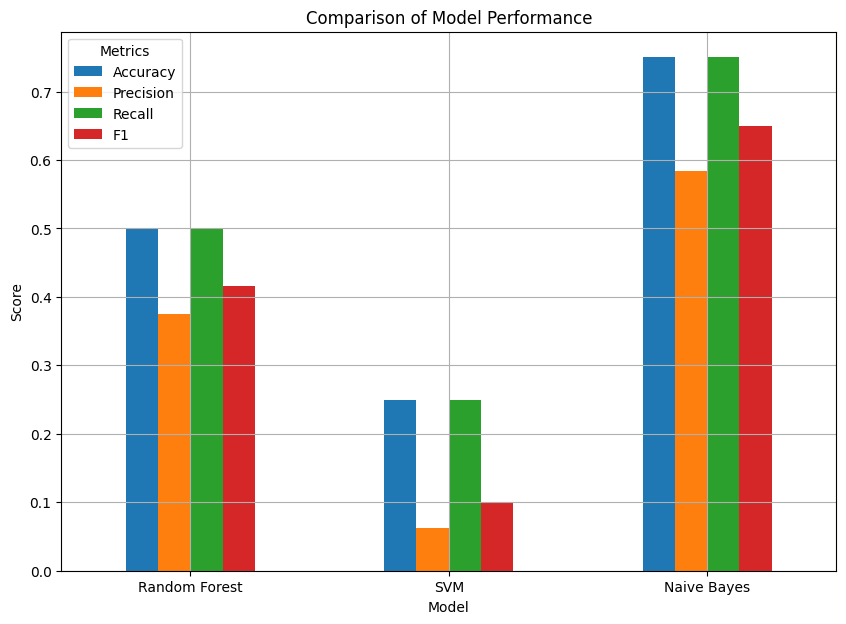

In [17]:
# Plotting
metrics_df.plot(kind='bar', figsize=(10, 7))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)  # Keep the model names horizontal for better readability
plt.legend(title='Metrics')
plt.grid(True)
plt.show()